In [15]:
# Importação da bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Lendo a base de dados

df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# checando informações dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
# Checando valores duplicados

df.duplicated().sum()

0

In [6]:
# Descrevendo informações básicas do dataset

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

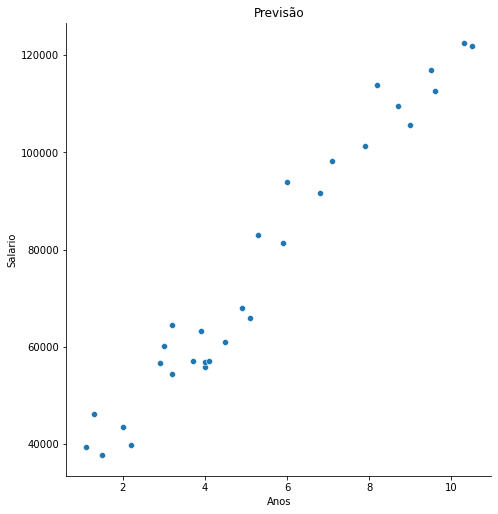

In [7]:
plt.figure(figsize=(12,6))
sns.pairplot(df, x_vars=['YearsExperience'], y_vars=['Salary'], size=7, kind='scatter')
plt.xlabel('Anos')
plt.ylabel('Salario')
plt.title('Previsão')
plt.show()

In [9]:
# Checando correlação entre as duas variáveis
#Podemos observar uma correlação muito forte e positiva

df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [10]:
# Separando os dados em X e y

X = df['YearsExperience']
y = df['Salary']

In [13]:
# Separando os dados em Train e Test

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [14]:
# Criando novo eixo para a coluna X

X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

C:\Users\bruno_6ppcx0g\AppData\Local\Temp\ipykernel_14484\4121765337.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]
C:\Users\bruno_6ppcx0g\AppData\Local\Temp\ipykernel_14484\4121765337.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [16]:
# Criando o modelo

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
# Criando as previsões com os dados separados para teste

y_pred = lr.predict(X_test)

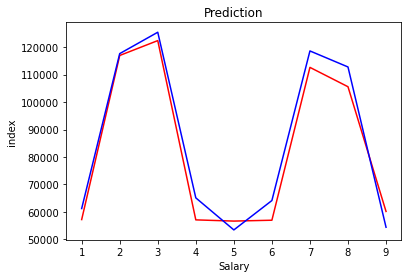

In [18]:
# Plotando gráfico das previsões e dos valores reais para comparação visual

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()